In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../Data/train.tsv', sep='\t')
dev = pd.read_csv('../Data/dev.tsv', sep='\t')
test = pd.read_csv('../Data/test.tsv', sep='\t',index_col=0)

In [3]:
train.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


In [4]:
#get columns needed for modeling
train_df = train[['label', 'claim','main_text']]
dev_df = dev[['label', 'claim','main_text']]
test_df = test[['label', 'claim','main_text']]

In [5]:
train_df.describe()

,label,claim,main_text
count,9805,9824,9806
unique,5,9824,9589
top,true,Designer Tommy Hilfiger stated that blacks and...,Doctors in India have been successful in treat...
freq,5078,1,12


In [6]:
dev_df.describe()

,label,claim,main_text
count,1215,1219,1217
unique,5,1219,1212
top,true,Georgia could be first state to test Trump hea...,Beta-Propiolactone is in vaccines and is known...
freq,629,1,3


In [7]:
test_df.describe()

,label,claim,main_text
count,1233,1235,1235
unique,4,1235,1231
top,true,Today’s marijuana is 300 percent to 800 percen...,US-Patent 8835624 is for the H1N1 virus. The p...
freq,599,1,2


**From data describe, we need to perform the following data processing tasks.**

1.Drop data with missing value for "label" and "main_text".

2.Check why there are 5 labels for train and dev.

3.Derive the labels distribution.

In [8]:
#1. Drop missing value
train_df = train_df.dropna()
dev_df = dev_df.dropna()
test_df = test_df.dropna()

In [9]:
#2. Check labels outlier
print(train_df.label.unique())
print(dev_df.label.unique())

['false' 'mixture' 'true' 'unproven' 'snopes']
['unproven' 'true' 'false' 'mixture'
 'National, Candidate Biography, Donald Trump, ']


In [10]:
train_df[train_df.label == 'snopes']

,label,claim,main_text
6655,snopes,Bethania Palma,"Politics, COVID-19"


In [11]:
train_df.iloc[0]

label                                                    false
claim        "The money the Clinton Foundation took from fr...
main_text    "Hillary Clinton is in the political crosshair...
Name: 0, dtype: object

In [12]:
dev_df[dev_df.label == 'National, Candidate Biography, Donald Trump, ']

,label,claim,main_text
17,"National, Candidate Biography, Donald Trump,","November 29, 2017",https://twitter.com/JoeNBC/status/935879100262...


In [13]:
# Only keep records with correct labels
train_df = train_df[(train_df.label == 'unproven') | (train_df.label == 'true') |
                    (train_df.label == 'mixture') | (train_df.label == 'false')]
dev_df = dev_df[(dev_df.label == 'unproven') | (dev_df.label == 'true') |
                    (dev_df.label == 'mixture') | (dev_df.label == 'false')]

In [14]:
# 3. Draw the distribution of labels

Text(0.5, 1.0, 'test')

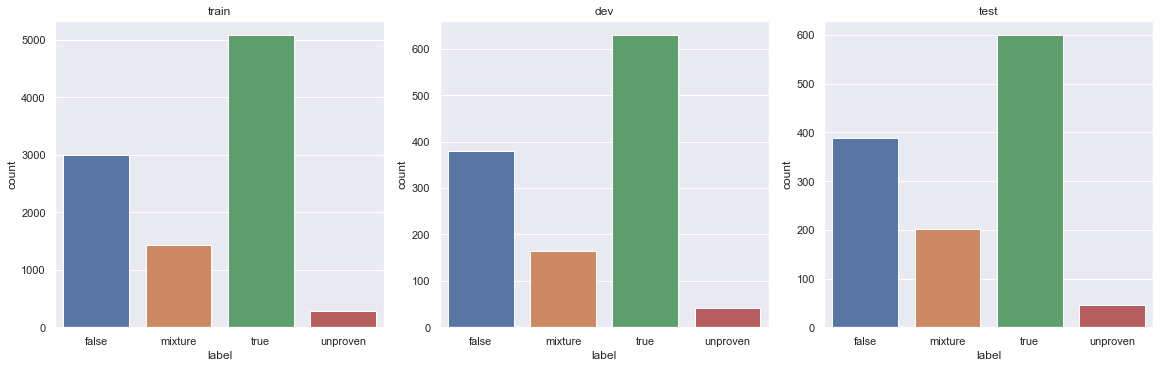

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['false', 'mixture', 'true', 'unproven']
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,3,constrained_layout=True, figsize=(16, 5))
axesSub = sns.countplot(x="label", data=train_df, ax=ax[0], order=labels)
axesSub.set_title('train')
axesSub = sns.countplot(x="label", data=dev_df, ax=ax[1], order=labels)
axesSub.set_title('dev')
axesSub = sns.countplot(x="label", data=test_df, ax=ax[2], order=labels)
axesSub.set_title('test')

**We can see the labels are not balanced but the distribution among train, dev, test are the same.**

**Since the labels are not balanced , we should use metrics like marco-F1 for evalation.**

In [17]:
# save the clean data
train_df.to_csv('../Data/clean_train.tsv', sep='\t', index=False)
dev_df.to_csv('../Data/clean_dev.tsv', sep='\t', index=False)
test_df.to_csv('../Data/clean_test.tsv', sep='\t', index=False)